# Importing all required dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from skimage.util.montage import montage2d
import tflearn
from PIL import Image
%matplotlib inline

# Getting the data Getting the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
#one hot encoding returns an array of zeros and a single one. One corresponds to the class
data = input_data.read_data_sets("MNIST/", one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print "Shape of images in training dataset {}".format(data.train.images.shape)
print "Shape of classes in training dataset {}".format(data.train.labels.shape)
print "Shape of images in testing dataset {}".format(data.test.images.shape)
print "Shape of classes in testing dataset {}".format(data.test.labels.shape)
print "Shape of images in validation dataset {}".format(data.validation.images.shape)
print "Shape of classes in validation dataset {}".format(data.validation.labels.shape)

Shape of images in training dataset (55000, 784)
Shape of classes in training dataset (55000, 10)
Shape of images in testing dataset (10000, 784)
Shape of classes in testing dataset (10000, 10)
Shape of images in validation dataset (5000, 784)
Shape of classes in validation dataset (5000, 10)


# Sample image

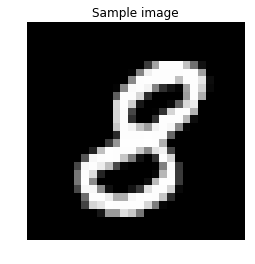

In [4]:
sample=data.train.images[5].reshape(28,28) 
plt.imshow(sample ,cmap='gray')
plt.title('Sample image')
plt.axis('off')
plt.show()

# Function to display montage of input data

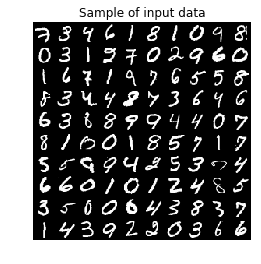

In [5]:
imgs=data.train.images[0:100]
montage_img=np.zeros([100,28,28])
for i in range(len(imgs)) : 
        montage_img[i]=imgs[i].reshape(28,28) 
plt.imshow(montage2d(montage_img), cmap='gray')
plt.title('Sample of input data')
plt.axis('off')
plt.show()

In [6]:
images=data.train.images
images=np.reshape(images,[images.shape[0],28,28])
mean_img = np.mean(images, axis=0)
std_img = np.std(images, axis=0)

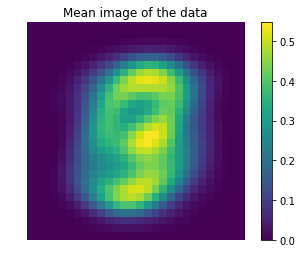

In [7]:
plt.imshow(mean_img)
plt.title('Mean image of the data')
plt.colorbar()
plt.axis('off')
plt.show()

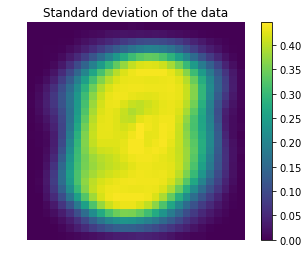

In [8]:
plt.imshow(std_img)
plt.colorbar()
plt.title('Standard deviation of the data')
plt.axis('off')
plt.show()

# Placeholders

In [10]:
# Input image
x=tf.placeholder(tf.float32,shape=[None,784]) 
# Input class
y_=tf.placeholder(tf.float32,shape=[None, 10])

# Model

In [11]:
# Input Layer

# Reshaping input for convolutional operation in tensorflow
# '-1' states that there is no fixed batch dimension, 28x28(=784) is reshaped from 784 pixels and '1' for a single
# channel, i.e a gray scale image
x_input=tf.reshape(x,[-1,28,28,1], name='input')

# First convolutional layer with 32 output filters, filter size 5x5, stride of 2,same padding, and RELU activation.

conv_layer1=tflearn.layers.conv.conv_2d(x_input, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

# 2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


# Second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)

# Fully connected layer
fcl= tflearn.layers.core.fully_connected(out_layer2, 1024, activation='relu')
fcl_dropout = tflearn.layers.core.dropout(fcl, 0.8)
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout, 10, activation='softmax', name='output')

In [12]:
print "Shape of input : {}".format(x_input.get_shape().as_list())
print "Shape of first convolutional layer : {}".format(out_layer1.get_shape().as_list())
print "Shape of second convolutional layer : {}".format(out_layer2.get_shape().as_list())
print "Shape of fully connected layer : {}".format(fcl.get_shape().as_list())
print "Shape of output layer : {}".format(y_predicted.get_shape().as_list())

Shape of input : [None, 28, 28, 1]
Shape of first convolutional layer : [None, 14, 14, 32]
Shape of second convolutional layer : [None, 7, 7, 32]
Shape of fully connected layer : [None, 1024]
Shape of output layer : [None, 10]


In [13]:
# Loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted), reduction_indices=[1]))
# Optimizer -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
# Accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
# Session parameters
sess = tf.InteractiveSession()
# Initialising variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [15]:
# grabbing the default graph
g = tf.get_default_graph()

# Operations in our graph
[op.name for op in g.get_operations()]

[u'is_training/Initializer/Const',
 u'is_training',
 u'is_training/Assign',
 u'is_training/read',
 u'Assign/value',
 u'Assign',
 u'Assign_1/value',
 u'Assign_1',
 u'Placeholder',
 u'Placeholder_1',
 u'input/shape',
 u'input',
 u'conv_layer_1/W/Initializer/random_uniform/shape',
 u'conv_layer_1/W/Initializer/random_uniform/min',
 u'conv_layer_1/W/Initializer/random_uniform/max',
 u'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 u'conv_layer_1/W/Initializer/random_uniform/sub',
 u'conv_layer_1/W/Initializer/random_uniform/mul',
 u'conv_layer_1/W/Initializer/random_uniform',
 u'conv_layer_1/W',
 u'conv_layer_1/W/Assign',
 u'conv_layer_1/W/read',
 u'conv_layer_1/W/Regularizer/L2Loss',
 u'conv_layer_1/W/Regularizer/L2-Loss/y',
 u'conv_layer_1/W/Regularizer/L2-Loss',
 u'conv_layer_1/b/Initializer/Const',
 u'conv_layer_1/b',
 u'conv_layer_1/b/Assign',
 u'conv_layer_1/b/read',
 u'conv_layer_1/Conv2D',
 u'conv_layer_1/BiasAdd',
 u'conv_layer_1/Relu',
 u'MaxPool2D/MaxPool',
 u'conv_l

In [16]:
# Number of interations
epoch=15000
batch_size=50

In [17]:
for i in range(epoch):
    #batch wise training 
    x_batch, y_batch = data.train.next_batch(batch_size)
    _,loss=sess.run([train_step, cross_entropy], feed_dict={x: x_batch,y_: y_batch})
    #_, loss,acc=sess.run([train_step,cross_entropy,accuracy], feed_dict={x:input_image , y_: input_class})
    
    if i%500==0:    
        Accuracy=sess.run(accuracy,
                           feed_dict={
                        x: data.test.images,
                        y_: data.test.labels
                      })
        Accuracy=round(Accuracy*100,2)
        print "Loss : {} , Accuracy on test set : {} %" .format(loss, Accuracy)
    elif i%100==0:
        print "Loss : {}" .format(loss)

Loss : 2.31236147881 , Accuracy on test set : 15.11 %
Loss : 0.635332345963
Loss : 0.401665091515
Loss : 0.184761032462
Loss : 0.199815273285
Loss : 0.212294012308 , Accuracy on test set : 94.8 %
Loss : 0.281112253666
Loss : 0.124109268188
Loss : 0.100063659251
Loss : 0.0801643580198
Loss : 0.322675675154 , Accuracy on test set : 96.93 %
Loss : 0.0995257943869
Loss : 0.419809609652
Loss : 0.113652966917
Loss : 0.106484107673
Loss : 0.0767761915922 , Accuracy on test set : 97.46 %
Loss : 0.0159260481596
Loss : 0.119960032403
Loss : 0.0568444281816
Loss : 0.163864955306
Loss : 0.0156861394644 , Accuracy on test set : 97.87 %
Loss : 0.0177565235645
Loss : 0.085745126009
Loss : 0.0392939001322
Loss : 0.0253672692925
Loss : 0.0936730280519 , Accuracy on test set : 98.28 %
Loss : 0.0647046640515
Loss : 0.113609179854
Loss : 0.0257056262344
Loss : 0.0954504683614
Loss : 0.00698057701811 , Accuracy on test set : 98.51 %
Loss : 0.00633713556454
Loss : 0.0404322631657
Loss : 0.0375560857356
Loss

# Validation Acccuracy

In [18]:
validation_accuracy=round((sess.run(accuracy,
                            feed_dict={
                             x: data.validation.images,
                             y_: data.validation.labels
                              }))*100,2)

print "Accuracy in the validation dataset: {}%".format(validation_accuracy)


Accuracy in the validation dataset: 99.36%
